# K-Means Clustering

K- means is one of the clustering methods. Clustering is an unsupervised machine learning algorithm. Clustering is nothing but grouping similar records together in a given dataset.

Broadly clustering algorithms are divided into Hierarchical and Non- Hierarchical algorithms.

Hierarchical method is useful when you want to arrange the clusters into a natural hierarchy, based on the distance calculation between observations in a given dataset. Here we will not be able to decide the no of clusters we may want to form before in hand. On the contrary, the non- hierarchical method is useful when you want to divide the dataset into a pre-specified number of clusters.

K- Means is a non- hirerchical clustering algorithm. It is an iterative algorithm which tries to partition the dataset into a pre-defined number of non-overlapping clusters(k) by minimizing the sum of squared distances from each data point to the cluster centroid(Within sum of squared distances- WSS).

# How K means Works?

* Pre-define the no. of clusters (k)
* Initialize cluster centroids by randomly selecting K data points.
* Calculate the WSS distances between each data point to all the cluster centroids.
* Assign each data point to the closest centers
* Steps 3 and 4 will be iterated until there is no reassignment of data points is required.

# Key Points

Since this algorithm is based on distance measure, it is recommended to standardize the data.
As K- means is iterative in nature and random initialization of centroids at the start of the algorithm, different initialization may lead to different clusters. Therefore it is recommended to run the algorithm several times and pick up the run which is giving the minimum WSS.

# The algorithm works as follows:

* First we initialize k points, called means, randomly.
* We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
* We repeat the process for a given number of iterations and at the end, we have our clusters.

#  K-means algorithm implementation to perform customer segmentation based on their Income and Spending Score
* Data: Customer data
* CustomerID, Unique ID of the customer                
* Genre, Gender of the customer(Male/Female)                     
* Age, Age of the Customer                        
* Annual Income (k), Annual income of the customer(/yr)         
* Spending Score (1-100), Derived metric based metrics like Avg order value, Avg visits etc..

In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# importing the mall dataset with pandas
dataset=pd.read_csv('Mall_Customers.csv')

In [3]:
dataset.head() # spending score is a derived column based on various factors like Avg order value, Avg visits etc..
# higher the score better is the spending amount. It ranges from 1 to 100, 1 being the lowest and 100 being the highest.

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
dataset.describe().head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000


In [6]:
dataset.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [13]:
X=dataset.iloc[:,[3,4]].values # .values makes the result ndarray type, X=dataset.iloc[:,[3,4]] results in dataframe   

In [14]:
type(X)

numpy.ndarray

# Elbow method to find the optimal value for K

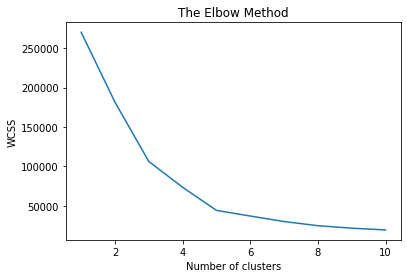

In [19]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
WCSS=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    # init is to avoid Random centroid Initialization trap, max_iter is for number of attempts before stoping further tuning of clusters
    # n_init is to control multiple initial centroid selection
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_) # is also called inertia
plt.plot(range(1,11),WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
# Let's apply K-means to the mall dataset wth K=5
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X) # returns vector with the cluster ID for each observation

# Visualizing the clusters along with their centroids

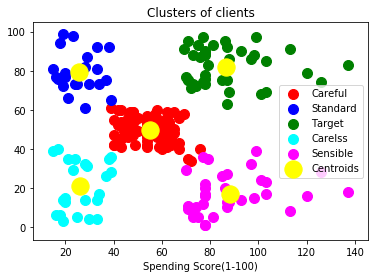

In [47]:
# Visualizing the clusters
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1], s=100, c='red', label='Careful')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1], s=100, c='blue', label='Standard') # s determines the size of the data point
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1], s=100, c='green', label='Target') # c determines the color of the data point
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1], s=100, c='cyan', label='Carelss')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1], s=100, c='magenta', label='Sensible')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=300, c='yellow',label='Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income(K$)')
plt.xlabel('Spending Score(1-100)')
plt.legend()
plt.show()

In [48]:
type(kmeans.cluster_centers_)
x=kmeans.cluster_centers_
x.shape

(5, 2)

In [49]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [50]:
print(kmeans.cluster_centers_[0,0])
print(kmeans.cluster_centers_[0,1])
print(kmeans.cluster_centers_[1,0])

55.29629629629632
49.51851851851852
25.727272727272755


In [51]:
type(kmeans.cluster_centers_[:,0])

numpy.ndarray